## 1. Set up the environment

In [1]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

from google.colab import files
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
kaggle_token_file = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir ~/.kaggle

In [5]:
!mv /content/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c mds-ufu-dl-test --force

 60% 10.0M/16.7M [00:00<00:00, 20.5MB/s]
100% 16.7M/16.7M [00:00<00:00, 31.3MB/s]


In [7]:
!unzip mds-ufu-dl-test.zip

Archive:  mds-ufu-dl-test.zip
  inflating: fmnist_test.csv         
  inflating: fmnist_train.csv        
  inflating: sample_submission.csv   


In [8]:
!ls -lah

total 88M
drwxr-xr-x 1 root root 4.0K Jun 12 11:58 .
drwxr-xr-x 1 root root 4.0K Jun 12 11:57 ..
drwxr-xr-x 4 root root 4.0K Jun  8 18:17 .config
-rw-r--r-- 1 root root  22M Apr 24 08:42 fmnist_test.csv
-rw-r--r-- 1 root root  50M Apr 24 08:42 fmnist_train.csv
-rw-r--r-- 1 root root  17M Jun 12 11:58 mds-ufu-dl-test.zip
drwxr-xr-x 1 root root 4.0K Jun  8 18:18 sample_data
-rw-r--r-- 1 root root  68K Apr 24 08:42 sample_submission.csv


## 2. Load datasets

### 2.1 Train dataset

In [9]:
# s1, s2 - slicing indices
def visualize_item(df, index, s1=1, s2=-1):
    pixels = df.iloc[index, s1:s2]
    pixels = pixels.values.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [10]:
train_df = pd.read_csv('/content/fmnist_train.csv')

In [11]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [12]:
train_df.isna().sum().sum()

424

In [13]:
train_df = train_df.fillna(0)

In [14]:
train_df.isna().sum().sum()

0

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB


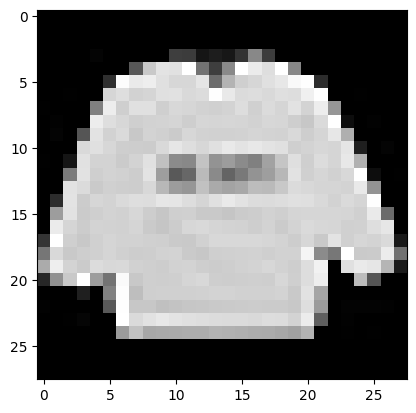

In [16]:
visualize_item(train_df, 0)

### 2.2 Test dataset

In [17]:
test_df = pd.read_csv('/content/fmnist_test.csv')

In [18]:
# just to be safe
test_df.isna().sum().sum()

0

In [19]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


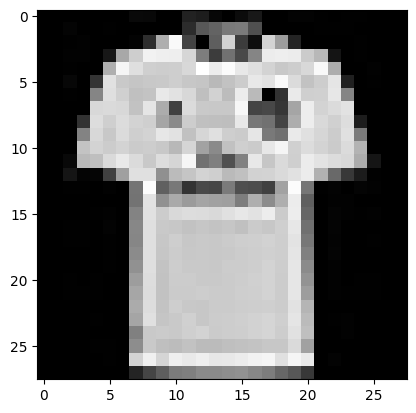

In [20]:
visualize_item(test_df, 0, s1=0)

## 3. Dataset preprocessing

In [33]:
# x_train
from sklearn.preprocessing import normalize

In [21]:
Y_train = train_df['label'].to_numpy()

### 3.1 Reshape

In [22]:
display(Y_train)
display(len(Y_train))

array([2, 9, 6, ..., 4, 6, 5])

17040

In [23]:
X_train = train_df.iloc[:, 1:785].to_numpy()

In [24]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [26]:
aim = test_df.iloc[:, 0:784].to_numpy()

In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train.shape

(11928, 28, 28, 1)

In [28]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(5112, 28, 28, 1)

In [29]:
aim = aim.reshape(aim.shape[0], 28, 28, 1)
aim.shape

(10000, 28, 28, 1)

### 3.2 Normalize the dataset

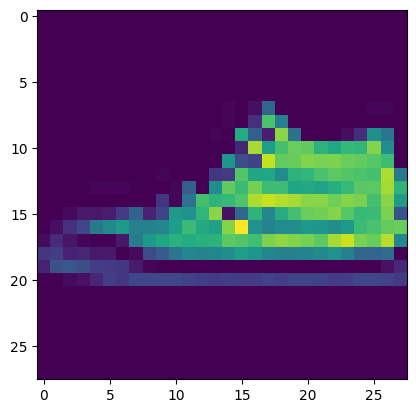

In [38]:
plt.imshow(aim[31])
plt.show()

In [34]:
train_x = x_train.astype('float32')
test_x = x_test.astype('float32')
val_x = aim.astype('float32')
train_x = train_x / 255
test_x = test_x / 255
val_x = val_x / 255
target_train = tf.keras.utils.to_categorical(y_train, 10)
target_test = tf.keras.utils.to_categorical(y_test, 10)

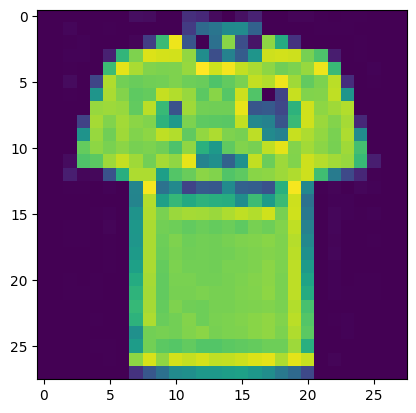

In [39]:
plt.imshow(val_x[0])
plt.show()

In [40]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 4. Learning

In [53]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model

In [50]:
BATCH = 200
EPOCH_QTY = 40
VERBOSITY = 1
VALIDATION_SPLIT = 0.2

In [46]:
model = Sequential()
# TODO: (28, 28, 1) - input_shape
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [51]:
model_history = model.fit(
    train_x,
    target_train,
    batch_size=BATCH,
    epochs=EPOCH_QTY,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/40
48/48 [==============================] - 9s 159ms/step - loss: 0.8720 - accuracy: 0.6978 - val_loss: 0.5515 - val_accuracy: 0.8043
Epoch 2/40
48/48 [==============================] - 9s 185ms/step - loss: 0.5402 - accuracy: 0.8039 - val_loss: 0.4696 - val_accuracy: 0.8324
Epoch 3/40
48/48 [==============================] - 9s 188ms/step - loss: 0.4777 - accuracy: 0.8273 - val_loss: 0.4238 - val_accuracy: 0.8504
Epoch 4/40
48/48 [==============================] - 7s 153ms/step - loss: 0.4341 - accuracy: 0.8442 - val_loss: 0.4079 - val_accuracy: 0.8546
Epoch 5/40
48/48 [==============================] - 9s 183ms/step - loss: 0.4007 - accuracy: 0.8613 - val_loss: 0.3932 - val_accuracy: 0.8630
Epoch 6/40
48/48 [==============================] - 8s 167ms/step - loss: 0.3773 - accuracy: 0.8646 - val_loss: 0.3672 - val_accuracy: 0.8730
Epoch 7/40
48/48 [==============================] - 9s 179ms/step - loss: 0.3554 - accuracy: 0.8739 - val_loss: 0.3619 - val_accuracy: 0.8701
Epoch 

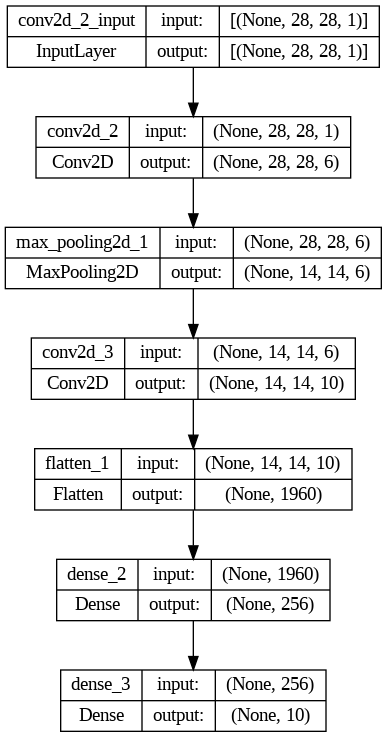

In [54]:
plot_model(model, show_shapes=True)